In [1]:
import torch
from IPython import display
from matplotlib import pyplot as plt 
import matplotlib_inline
import numpy as np
import random


In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)

print(features)

labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)


tensor([[-1.9620, -0.1766],
        [ 0.0322, -1.7390],
        [-0.1135,  0.8708],
        ...,
        [-0.7275, -1.0039],
        [ 0.3820, -1.0727],
        [-0.7551,  0.9692]])


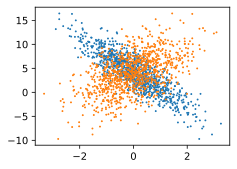

In [7]:
def use_svg_display():    # 用矢量图显示   
    matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):   
    use_svg_display()   # 设置图的尺寸  
    plt.rcParams['figure.figsize'] = figsize
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

plt.scatter(features[:, 0].numpy(), labels.numpy(), 1)


In [35]:
num_inputs = 2
num_examples = len(features)
print(num_examples)
print(features.shape)
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)


1000
torch.Size([1000, 2])


In [24]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)


In [14]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 


tensor([0.], requires_grad=True)

In [15]:
#  define model

def linreg(X, w, b):
    return torch.mm(X, w) + b


In [16]:
# define loss
def squared_loss(y_hat, y): 
    return (y_hat - y.view(y_hat.size())) ** 2 / 2


In [17]:
# gradient decient
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data


In [18]:
lr = 0.03
num_epochs = 3
batch_size=10
net = linreg
loss = squared_loss
for epoch in range(num_epochs):       # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次
    for X, y in data_iter(batch_size, features, labels):       # x和y分别是小批量样本的特征和标签
        l = loss(net(X, w, b), y).sum()     # l是有关小批量X和y的损失
        l.backward()     # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)     # 使用小批量随机梯度下降迭代模型参数
        w.grad.data.zero_()    # 梯度清零
        b.grad.data.zero_()
        train_l = loss(net(features, w, b), labels)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))


epoch 1, loss 14.668302
epoch 1, loss 13.960398
epoch 1, loss 13.223693
epoch 1, loss 12.114179
epoch 1, loss 11.579047
epoch 1, loss 11.128061
epoch 1, loss 10.320876
epoch 1, loss 9.890381
epoch 1, loss 9.482110
epoch 1, loss 9.184568
epoch 1, loss 8.804235
epoch 1, loss 8.465546
epoch 1, loss 7.868091
epoch 1, loss 7.667583
epoch 1, loss 7.437676
epoch 1, loss 7.140725
epoch 1, loss 6.912313
epoch 1, loss 6.447994
epoch 1, loss 6.172525
epoch 1, loss 5.946647
epoch 1, loss 5.604641
epoch 1, loss 5.436064
epoch 1, loss 5.182696
epoch 1, loss 4.663713
epoch 1, loss 4.572431
epoch 1, loss 4.310447
epoch 1, loss 4.206502
epoch 1, loss 4.087770
epoch 1, loss 3.870976
epoch 1, loss 3.700434
epoch 1, loss 3.223403
epoch 1, loss 3.010380
epoch 1, loss 2.836351
epoch 1, loss 2.649073
epoch 1, loss 2.519245
epoch 1, loss 2.370189
epoch 1, loss 2.201908
epoch 1, loss 2.128064
epoch 1, loss 1.999366
epoch 1, loss 1.865246
epoch 1, loss 1.764216
epoch 1, loss 1.641906
epoch 1, loss 1.552286
epoc

In [36]:
print(true_w, '\n', w)
print(true_b, '\n', b)


[2, -3.4] 
 tensor([[-0.0009],
        [-0.0150]])
4.2 
 tensor([0.])


In [38]:
### 导入库
import torch.utils.data as Data
import torch.nn as nn

lr = 0.03
batch_size = 10 # 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels) # 把 dataset 放入 DataLoader

data_iter = Data.DataLoader(
            dataset=dataset,      # torch TensorDataset format
            batch_size=batch_size,      # mini batch size
            shuffle=True,               # 是否打乱数据 (训练集一般需要进行打乱)
            num_workers=0,              # 多线程来读数据，注意在Windows下需要设置为0
                            )
                            


In [39]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()      # call father function to init 
        self.linear = nn.Linear(n_feature, 1)  # function prototype: `torch.nn.Linear(in_features, out_features, bias=True)`

    def forward(self, x):
        y = self.linear(x)
        return y
    
net = LinearNet(num_inputs)
print(net)


LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [40]:
#写法一
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # 此处可以添加其它层
)

# 写法二
# net = nn.Sequential()
# net.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module………

# 写法三
# from collections import OrderedDict
# net = nn.Sequential(OrderedDict([
#                 ('linear', nn.Linear(num_inputs, 1))
#               # ……]))
#![image.png](attachment:image.png)

In [41]:
from torch.nn import init

init.normal_(net[0].weight, mean=0.0, std=0.01)
init.constant_(net[0].bias, val=0.0)  # or you can use `net[0].bias.data.fill_(0)` to modify it directly


Parameter containing:
tensor([0.], requires_grad=True)

In [42]:
loss = nn.MSELoss()
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.03)  #梯度下降的学习率指定为0.03

# 可以为不同的子网络设置不同学习率
# optimizer =optim.SGD([
#     # 如果不指定学习率，则用默认的最外层学习率
#     {'params': net.subnet1.parameters()}, # lr=0.03
#     {'params': net.subnet2.parameters(), 'lr': 0.01}
# ], lr=0.03)


In [43]:
num_epochs = 8
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # reset gradient, equal to net.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))


epoch 1, loss: 0.000198
epoch 2, loss: 0.000064
epoch 3, loss: 0.000055
epoch 4, loss: 0.000108
epoch 5, loss: 0.000077
epoch 6, loss: 0.000227
epoch 7, loss: 0.000052
epoch 8, loss: 0.000140


In [45]:
import torch
import matplotlib.pyplot as plt


In [46]:
n_data = torch.ones(50, 2)  # 数据的基本形态
x1 = torch.normal(2 * n_data, 1)  # shape=(50, 2)
y1 = torch.zeros(50)  # 类型0 shape=(50, 1)
x2 = torch.normal(-2 * n_data, 1)  # 类型1 shape=(50, 1)
y2 = torch.ones(50)  # 类型1 shape=(50, 1)
# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x1, x2), 0).type(torch.FloatTensor)
y = torch.cat((y1, y2), 0).type(torch.FloatTensor)


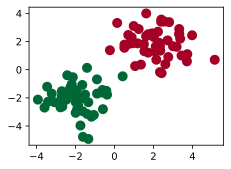

In [47]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()
